# PA 2: Classification - Decision Tree

## Student Details (1 Point)

First Student Name and ID: Aiman Abdullah 



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]

3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
import pydot as pydot

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn library
import sklearn
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from sklearn.tree import export_graphviz

from IPython.display import Image
from sklearn import metrics


In [2]:

#1- Load Dataset cardio_train
#read the csv file into a Pandas data frame
df_data = pd.read_csv('cardio_train.csv', sep=';', encoding='latin1')
print(df_data.info())


#2- return the first 5 rows of the dataset
print("############ Head Records ############")
print(df_data.head())
print("############ Tail Records ############")
print(df_data.tail())


#3 - Print the class label
print(" The class Label is: \n")
print(df_data['cardio'])


#ax=plt.subplots(figsize=(8,6))
#ax =sns.countplot(x="cholesterol", hue="cardio", data=df_data)
#plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
############ Head Records ############
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1 

In [3]:
#4 - Split your dataset 70% for training, and 30% for testing the classifier

#The dataset is split into testing and training data of size 30% and 70% respectively.
training_set, test_set = train_test_split(df_data, train_size=0.70, test_size=0.30)


#printing the number of rows and columns in the training and test data
print(" The Training Set {}:".format(training_set))
print(" The Test Set {}:".format(test_set))


 The Training Set           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
63967  91323  21018       1     152    86.0    120     90            1     1   
13768  19653  21796       1     156    63.0     90     60            1     1   
6069    8625  18240       1     160    50.0    110     80            1     1   
19458  27794  21735       1     155    75.0    170   1100            1     1   
14848  21223  23234       1     152    69.0    120     80            3     3   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
10305  14709  19701       2     168    85.0    130     90            1     2   
25177  35947  14725       2     179    89.0    120     80            1     1   
12469  17801  15872       1     160    90.0    130     90            1     1   
27617  39484  20387       1     156    77.0    100     80            1     1   
35253  50360  14642       1     155    62.0    110     80            1     1   

       smoke  alco  a

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]


4) Print the decision tree visualization.  [5 points]


Decision Tree Using GINI

The confusion matrix using gini is 



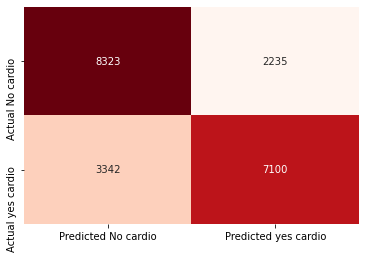

The classification report for the given dataset using gini as a measure is: 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10558
           1       0.76      0.68      0.72     10442

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



In [4]:
# Decision Tree
'''
Steps when work with Classifiers:
1- Drop the coulmns which you think are not important to you when do classifying or you can leave them
2- Must convert All attributes except Class label to Category type
3- Split you data using train_test_split()
4- use fit() to Train your model
5- Predicate your new output by pass your X_test set to your Model
'''
# New_datFrame will be my Dataframe without those Columns
New_datFrame =df_data.drop(['id','cardio','gender'], axis=1)

# Class label column
Y=df_data['cardio']

categorical = ['cholesterol','gluc','smoke','alco','active']

# Encoding all attribute values in order to process using scikit
#Categorical columns are dummified by one-hot encoding
data_set = pd.get_dummies(New_datFrame,drop_first=True, columns=categorical, prefix=categorical)

#Train data is scaled using Min-Max scaling
#data_set = (data_set - np.min(data_set)) / (np.max(data_set) - np.min(data_set)).values


# Split Train, Test sets to 4 Subsets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(data_set, Y, train_size = 0.70, test_size = 0.30)


# 1- Use gini and entropy to measure the quality of a split
module = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=6,max_leaf_nodes=29)


# Train Module using Train Set
module.fit(X_Train, Y_Train)

# Predict Class label using Test Set
Y_classLabel_predicted = module.predict(X_Test)


# 3- Calculate and print the confusion matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
print('The confusion matrix using gini is \n')
ConfusionMatrix = pd.DataFrame(confusion_matrix(Y_Test, Y_classLabel_predicted),columns=['Predicted No cardio', 'Predicted yes cardio'], index=['Actual No cardio', 'Actual yes cardio'])
sns.heatmap(ConfusionMatrix, annot=True,cmap="Reds",fmt="d",cbar=False)
plt.show()


#  the classification Report (includes: precision, recall, f1-score, and support.
print('The classification report for the given dataset using gini as a measure is: \n')
print(classification_report(Y_Test, Y_classLabel_predicted))




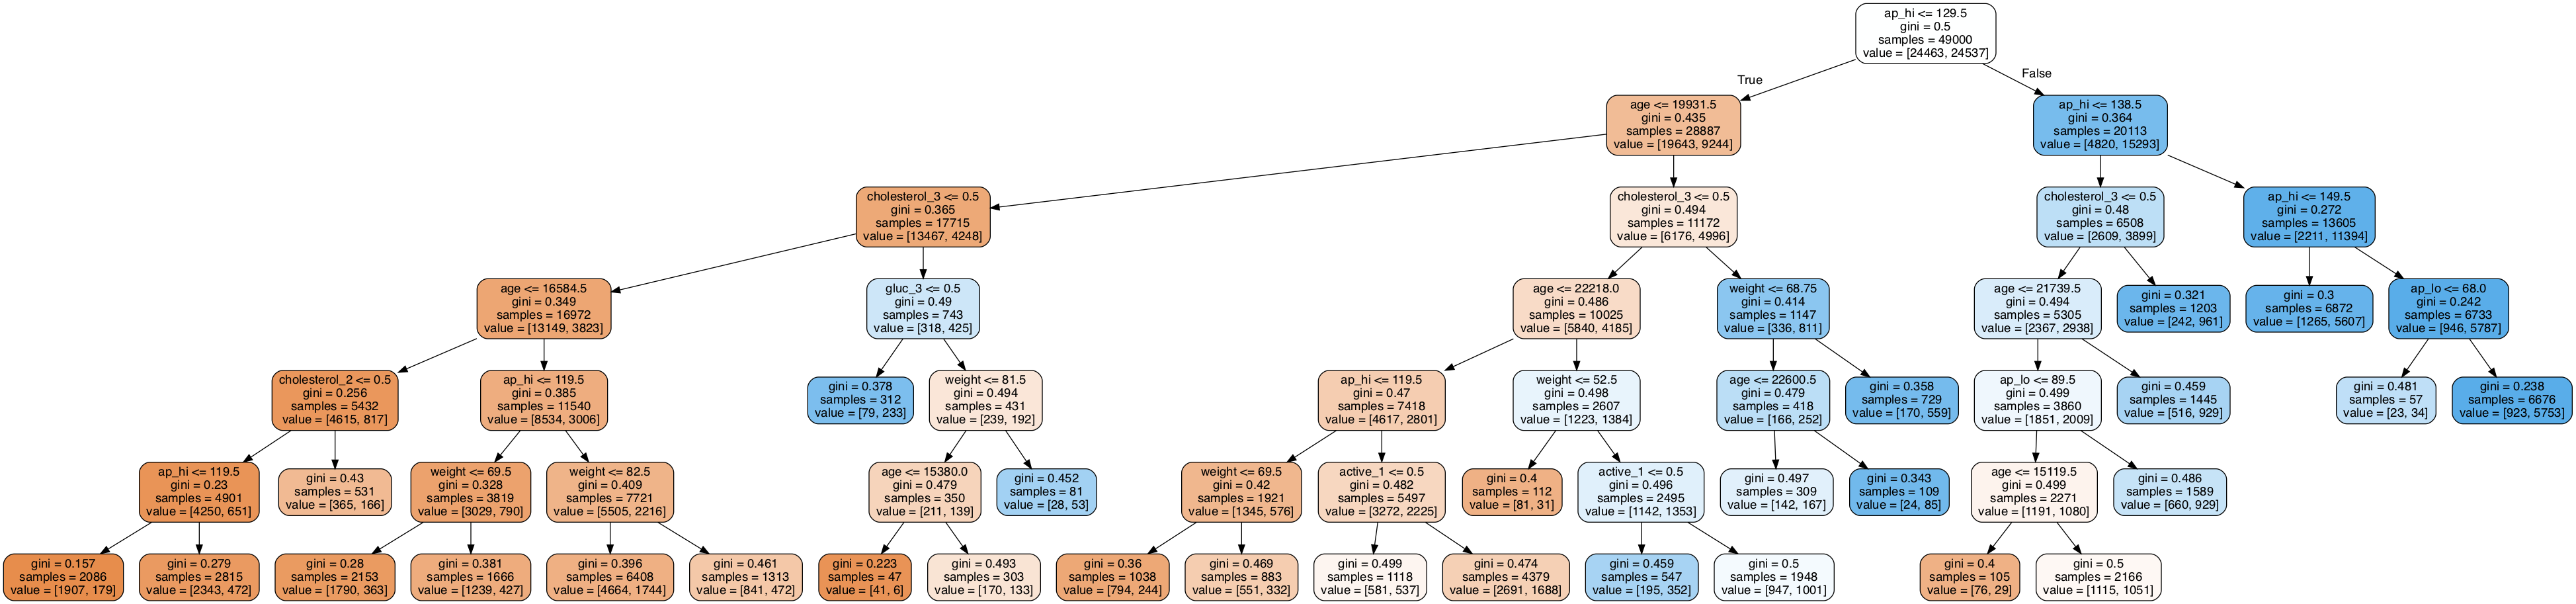

In [5]:

# 4-  Print the decision tree visualization.

# List store all the Attributes names
dimensions = list(X_Test.columns)

# Using IO library to initialized Data Stream
data = StringIO()

# converting decision tree using gini classifier into dot file
export_graphviz(module,out_file=data,feature_names=dimensions,filled=True,rounded=True)

# pydot is used to convert this into an image
graph = pydot.graph_from_dot_data(data.getvalue())
Image(graph[0].create_png())

Decision Tree Using ENTROPY

The confusion matrix using Entropy is 



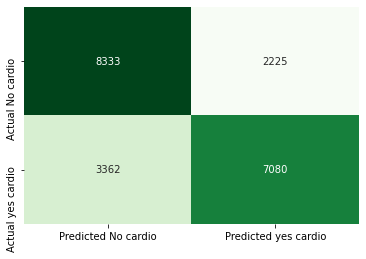

The classification report for the given dataset using Entropy as a measure is: 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10558
           1       0.76      0.68      0.72     10442

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



In [6]:

# 1- Use gini and entropy to measure the quality of a split
module2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=6,max_leaf_nodes=25)


# Train Module using Train Set
module2.fit(X_Train, Y_Train)

# Predict Class label using Test Set
Y_classLabel_predicted2 = module2.predict(X_Test)


# 3- Calculate and print the confusion matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
print('The confusion matrix using Entropy is \n')
ConfusionMatrix = pd.DataFrame(confusion_matrix(Y_Test, Y_classLabel_predicted2),columns=['Predicted No cardio', 'Predicted yes cardio'], index=['Actual No cardio', 'Actual yes cardio'])
sns.heatmap(ConfusionMatrix, annot=True,cmap="Greens",fmt="d",cbar=False)
plt.show()


#  the classification Report (includes: precision, recall, f1-score, and support.
print('The classification report for the given dataset using Entropy as a measure is: \n')
print(classification_report(Y_Test, Y_classLabel_predicted2))



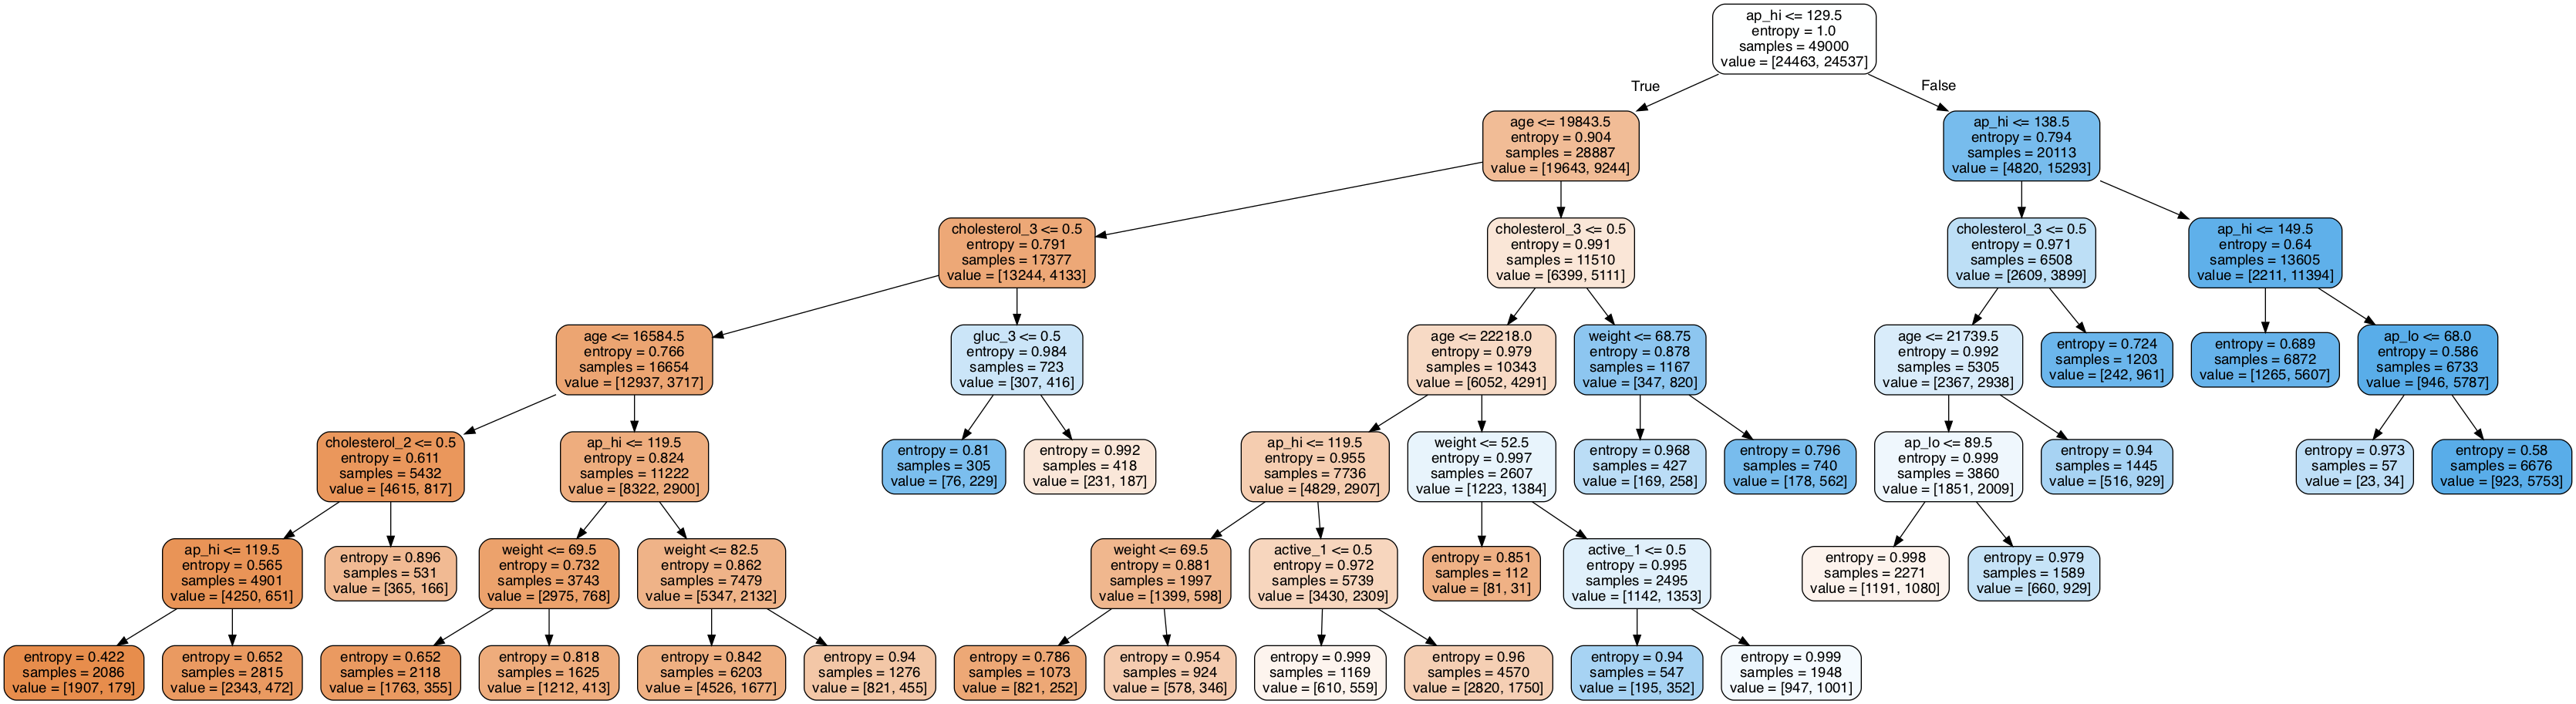

In [7]:

# 4-  Print the decision tree visualization.

# List store all the Attributes names
dimensions = list(X_Test.columns)

# Using IO library to initialized Data Stream
data = StringIO()

# converting decision tree using gini classifier into dot file
export_graphviz(module2,out_file=data,feature_names=dimensions,filled=True,rounded=True)

# pydot is used to convert this into an image
graph = pydot.graph_from_dot_data(data.getvalue())
Image(graph[0].create_png())

# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

In [8]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import seaborn as sn

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_Train,Y_Train)

#Predict the response for test dataset
y_pred = model.predict(X_Test)

In [9]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_classLabel_predicted))

Accuracy: 0.7344285714285714


<AxesSubplot:>

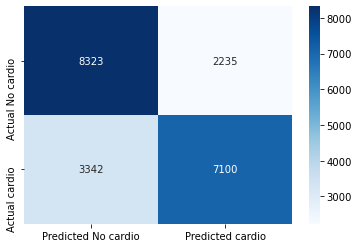

In [10]:
df_cm = pd.DataFrame(
    confusion_matrix(Y_Test, Y_classLabel_predicted),
    columns=['Predicted No cardio', 'Predicted cardio'],
    index=['Actual No cardio', 'Actual cardio']
)
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [11]:
#Classification report for Naive Bayes
print(classification_report(Y_Test,Y_classLabel_predicted))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10558
           1       0.76      0.68      0.72     10442

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points]  like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]


4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [3 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.